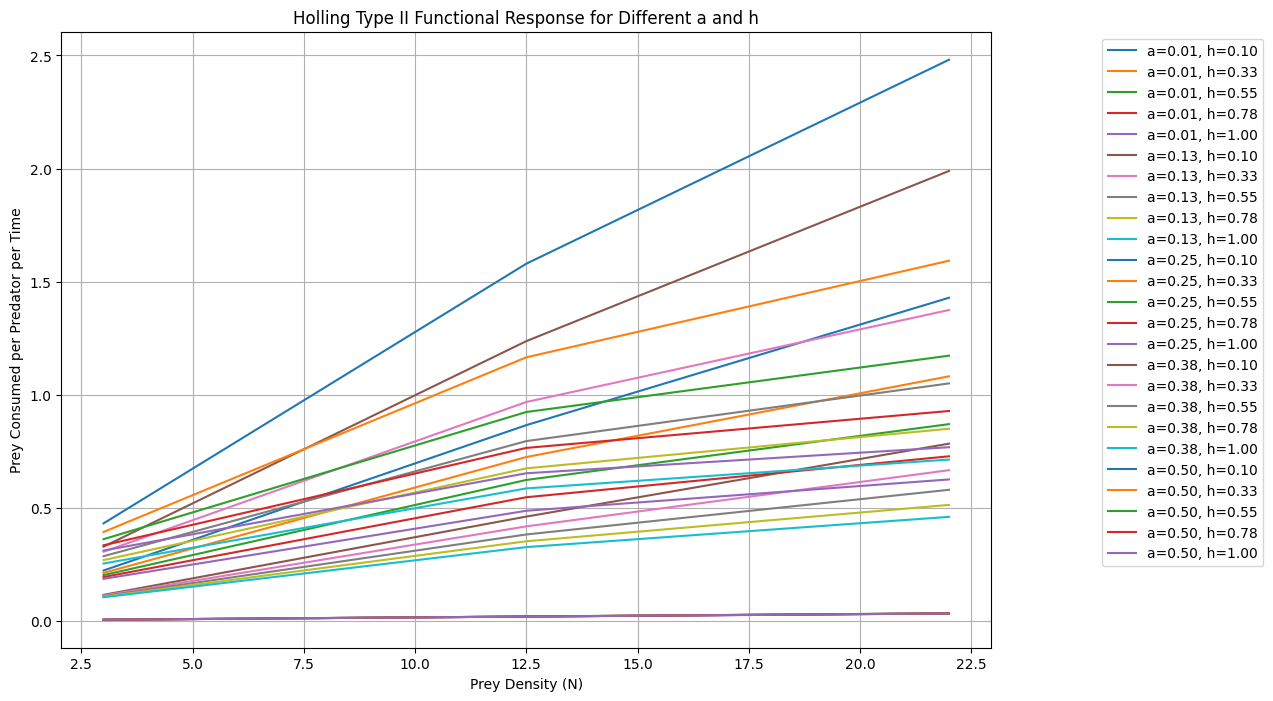

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def holling_type_2(N, s, a, h):
    """
    Computes the Holling Type II functional response.

    Parameters:
    N (float or array): Prey density (prey per unit area)
    a (float): Attack rate (strikes per night scaled to hour)
    h (float): Handling time (time per prey item)
    s (float): strike success probability

    Returns:
    float or array: Number of prey consumed per predator per unit time
    """
    return (s*a * N) / (1 + (s*a) * h * N)

# Define ranges of attack rates and handling times
strike_success = 0.3
attack_rates = np.linspace(0.005, 0.5, 5)  # Range of attack rates
handling_times = np.linspace(0.1, 1.0, 5)  # Range of handling times
N_values = np.linspace(3, 22, 3)  # Range of prey densities

# Create plots for each combination of attack rate and handling time
plt.figure(figsize=(12, 8))

for a in attack_rates:
    for h in handling_times:
        f_N = holling_type_2(N_values,strike_success, a, h)
        plt.plot(N_values, f_N, label=f'a={a:.2f}, h={h:.2f}')

plt.xlabel('Prey Density (N)')
plt.ylabel('Prey Consumed per Predator per Time')
plt.title('Holling Type II Functional Response for Different a and h')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


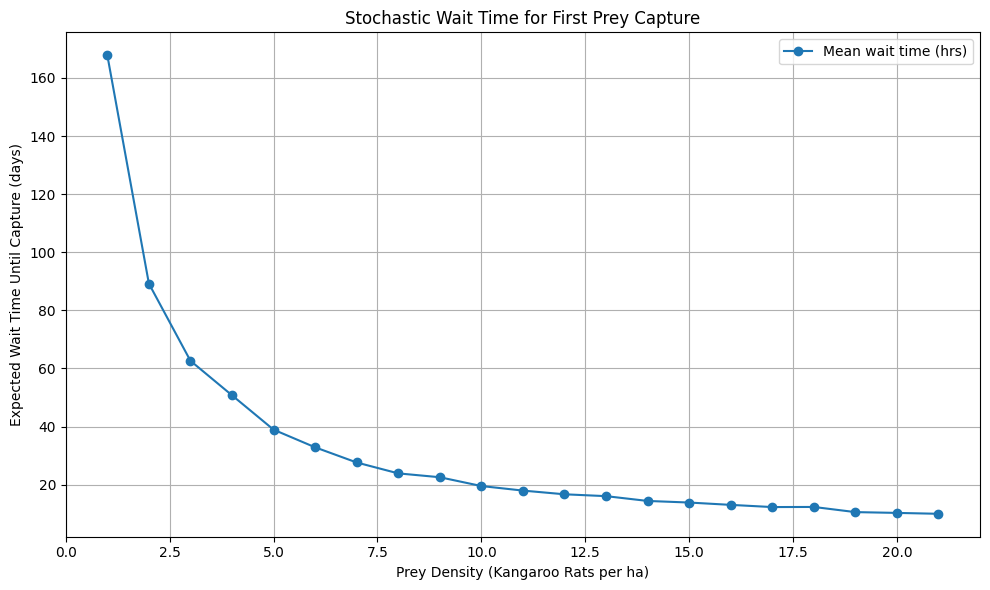

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def holling_type_2(N, a, h):
    """Expected number of encounters per time step (e.g., per hour)."""
    return (a * N) / (1 + a * h * N)

def simulate_wait_time(prey_density, s, a, h, max_hours=8760):
    """Simulates hours until successful prey capture given prey density."""
    for hour in range(1, max_hours + 1):
        encounter_prob = holling_type_2(prey_density, a, h)
        if np.random.rand() < encounter_prob:
            if np.random.rand() < s:  # Successful strike
                return hour
    return max_hours  # timeout (no successful prey capture)

# Parameters
prey_densities = np.linspace(1, 21, 21)
strike_success = 0.22
attack_rate = 0.001  # strikes/hour
handling_time = 5     # hours per prey

# Run simulations
mean_wait_times = []
for N in prey_densities:
    wait_times = [simulate_wait_time(N, strike_success, attack_rate, handling_time)/24 for _ in range(1000)]
    mean_wait_times.append(np.mean(wait_times))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot( prey_densities, mean_wait_times, marker='o', label='Mean wait time (hrs)')
plt.xlabel('Prey Density (Kangaroo Rats per ha)')
plt.ylabel('Expected Wait Time Until Capture (days)')
plt.title('Stochastic Wait Time for First Prey Capture')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


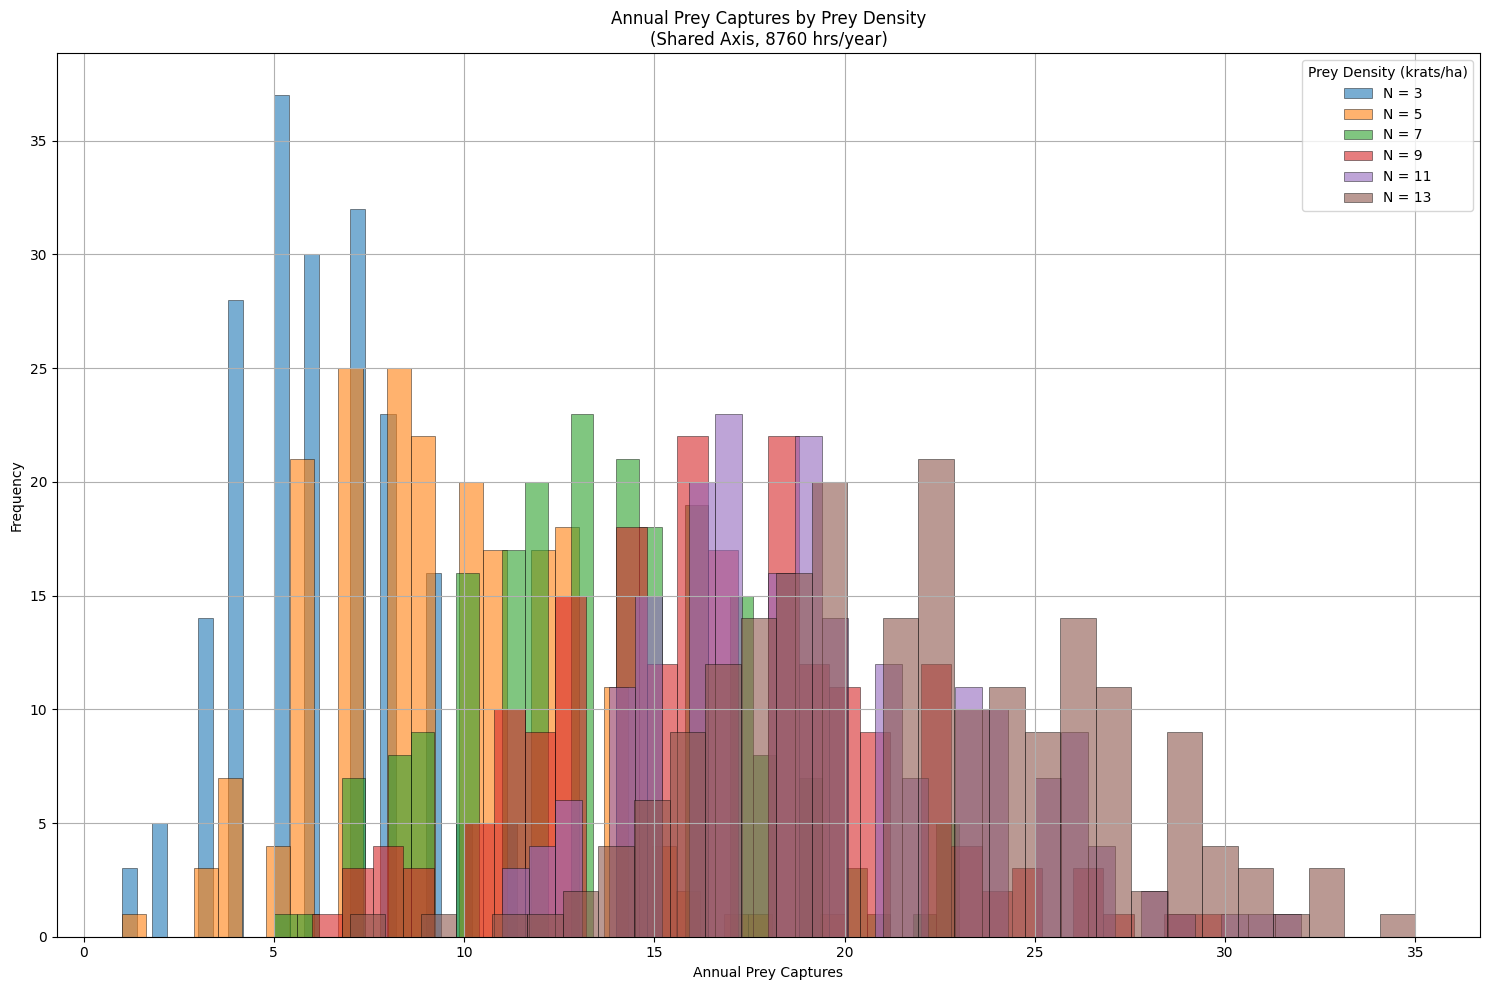

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_full_year_fast(prey_density, s, a, h, total_hours=2000):
    """Optimized annual simulation with precomputed encounter rate and Poisson draw."""
    prey_captured = 0
    expected_prey_encountered = holling_type_2(prey_density, a, h)
    for _ in range(total_hours):
        prey_encountered = np.random.poisson(expected_prey_encountered)
        if prey_encountered > 0:
            prey_captured += np.sum(np.random.rand(prey_encountered) < s)
    return prey_captured

# Define the Holling Type II functional response
def holling_type_2(N, a, h):
    """Expected number of encounters per time step (e.g., per hour)."""
    return (a * N) / (1 + a * h * N)


# Parameters
prey_densities = [3, 5, 7, 9, 11, 13]
strike_success = 0.22
attack_rate = 0.005
handling_time = 5
simulations = 200

# Run and plot for each prey density
plt.figure(figsize=(15, 10))

for prey_density in prey_densities:
    captures = [simulate_full_year_fast(prey_density, strike_success, attack_rate, handling_time) for _ in range(simulations)]
    plt.hist(captures, bins=30, alpha=0.6, label=f'N = {prey_density}', edgecolor='black', linewidth=0.5)

plt.xlabel('Annual Prey Captures')
plt.ylabel('Frequency')
plt.title('Annual Prey Captures by Prey Density\n(Shared Axis, 8760 hrs/year)')
plt.legend(title='Prey Density (krats/ha)')
plt.grid(True)
plt.tight_layout()
plt.show()



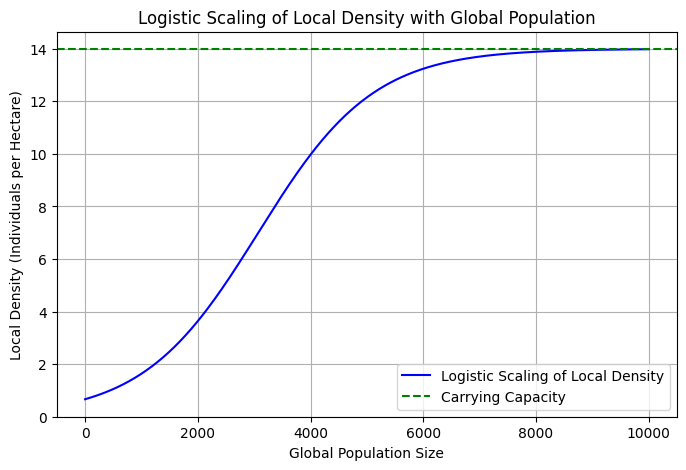

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_population_density_function(global_population, total_area, carrying_capacity, growth_rate, threshold_density):
    """
    Computes local density based on global population using logistic scaling.

    Parameters:
    - global_population (int or array): Total population size.
    - total_area (int): Total hectares.
    - carrying_capacity (float): Maximum possible density per hectare.
    - growth_rate (float): Sensitivity of density changes.
    - threshold_density (float): Density at which changes have the largest effect.

    Returns:
    - local_density (float or array): Adjusted local density based on feedback.
    """
    avg_density = global_population / total_area
    adjusted_density = carrying_capacity / (1 + np.exp(-growth_rate * (avg_density - threshold_density)))
    return adjusted_density

# Define parameters
total_area = 1024  # hectares
carrying_capacity = 14  # max density per hectare
growth_rate = 1  # scaling sensitivity
threshold_density = 3  # middle of the range

# Generate population values
global_population = np.linspace(0, 10000, 500)  # Population values from 0 to 10,000

# Compute local densities
new_local_density = logistic_population_density_function(global_population, total_area, carrying_capacity, growth_rate, threshold_density)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(global_population, new_local_density, label='Logistic Scaling of Local Density', color='blue')
#plt.axvline(x=total_area * threshold_density, linestyle="--", color="red", label="Threshold Population")
plt.axhline(y=carrying_capacity, linestyle="--", color="green", label="Carrying Capacity")
plt.xlabel("Global Population Size")
plt.ylabel("Local Density (Individuals per Hectare)")
plt.title("Logistic Scaling of Local Density with Global Population")
plt.legend()
plt.grid()
plt.show()


In [1]:
import numpy as np
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s